## Template for Initial data exploration

## Importing required Packages

In [1]:
#Importing the required packages
import os
import math
import numpy as np
import pandas as pd
import datetime
os.chdir(r"C:\Users\Yashu Dhatrika\Desktop\CNS")

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
#from pandas.tools.plotting import scatter_matrix
#from mpl_toolkits.mplot3d import Axes3D

## Loading the data and Checking the size of data

In [2]:
df_2015 = pd.read_excel('sample.xlsx')

# Displaying the size of the Dataframe in Memory
def convert_size(size_bytes):
   if size_bytes == 0:
       return "0B"
   size_name = ("Bytes", "KB", "MB", "GB", "TB", "PB", "EB", "ZB", "YB")
   i = int(math.floor(math.log(size_bytes, 1024)))
   p = math.pow(1024, i)
   s = round(size_bytes / p, 2)
   return "%s %s" % (s, size_name[i])
convert_size(df_2015.memory_usage().sum())


'83.61 KB'

## Dropping the variable which represents unique key or contains majority of repetitive values

In [4]:
#%% Dropping all the variable, if it is kinda key (contains unique value for each record or have only few distinct value)
for col in df_2015.columns:
    if len(df_2015[col].unique())/len(df_2015)>0.05 and len(df_2015[col].unique())/len(df_2015)<0.95:
        df_2015.drop(col,inplace=True,axis=1)
        

## What datatypes are in dataframe and retrieving the top records

In [7]:
# Different data types in the dataset
print(df_2015.dtypes)

# Describing all the Numerical Features
print(df_2015.describe())

# Describing all the Categorical Features
print(df_2015.describe(include=['O']))

# Let's have a quick look at our data
df_2015.head()


PassengerId     int64
Survived        int64
Pclass          int64
Name           object
Sex            object
SibSp           int64
Parch           int64
Embarked       object
dtype: object
       PassengerId    Survived      Pclass       SibSp       Parch
count   891.000000  891.000000  891.000000  891.000000  891.000000
mean    446.000000    0.383838    2.308642    0.523008    0.381594
std     257.353842    0.486592    0.836071    1.102743    0.806057
min       1.000000    0.000000    1.000000    0.000000    0.000000
25%     223.500000    0.000000    2.000000    0.000000    0.000000
50%     446.000000    0.000000    3.000000    0.000000    0.000000
75%     668.500000    1.000000    3.000000    1.000000    0.000000
max     891.000000    1.000000    3.000000    8.000000    6.000000
                                        Name   Sex Embarked
count                                    891   891      889
unique                                   891     2        3
top     Ford, Miss. Doolina

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,S
4,5,0,3,"Allen, Mr. William Henry",male,0,0,S


## Data Exploration - Univariate
When exploring our dataset and its features, we have many options available to us. We can explore each feature individually, or compare pairs of features, finding the correlation between. Let's start with some simple Univariate (one feature) analysis.

Features can be of multiple types:Nominal,Ordinal,Interval, Ratio
There are multiple ways of manipulating each feature type, but for simplicity, we'll define only two feature types:

Numerical: any feature that contains numeric values.
Categorical: any feature that contains categories, or text.

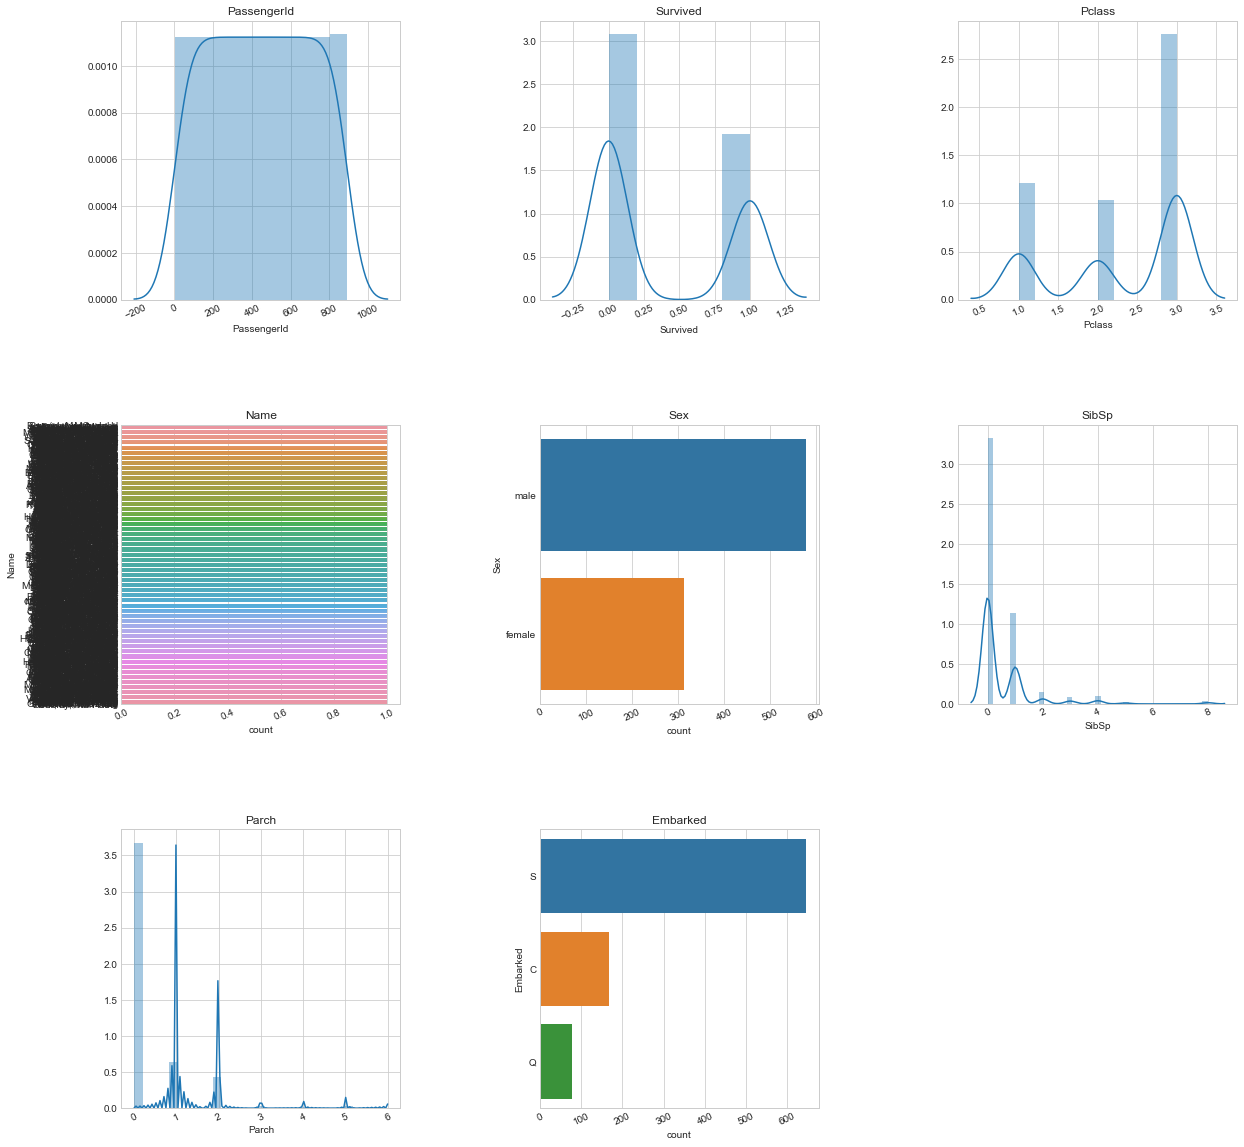

In [8]:
# Let’s plot the distribution of each feature
def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)
    
plot_distribution(df_2015, cols=3, width=20, height=20, hspace=0.45, wspace=0.5)


## What missing values are there?

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Embarked       2
dtype: int64

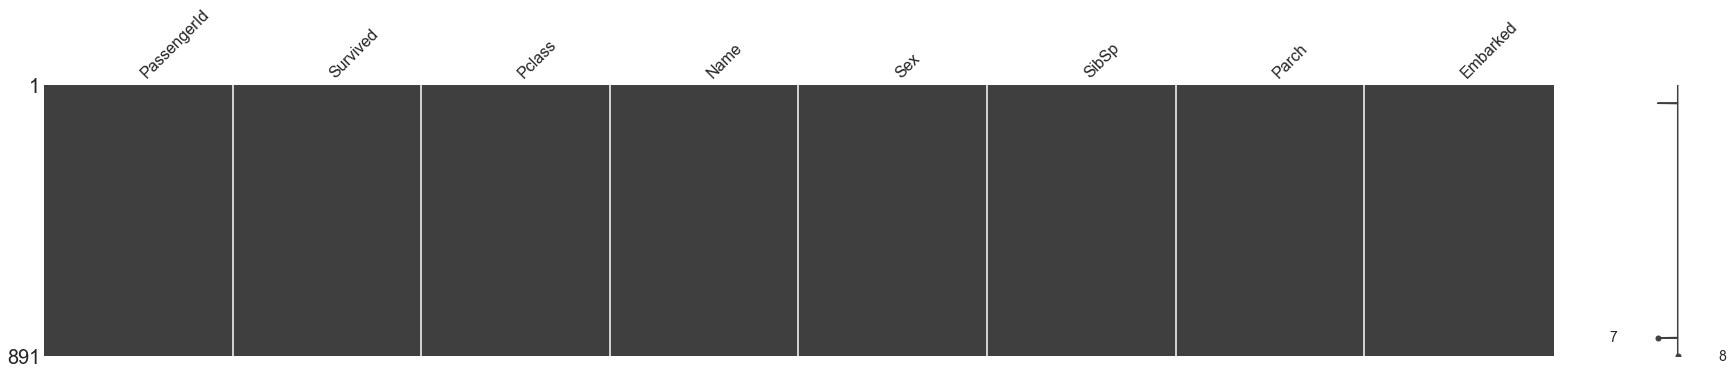

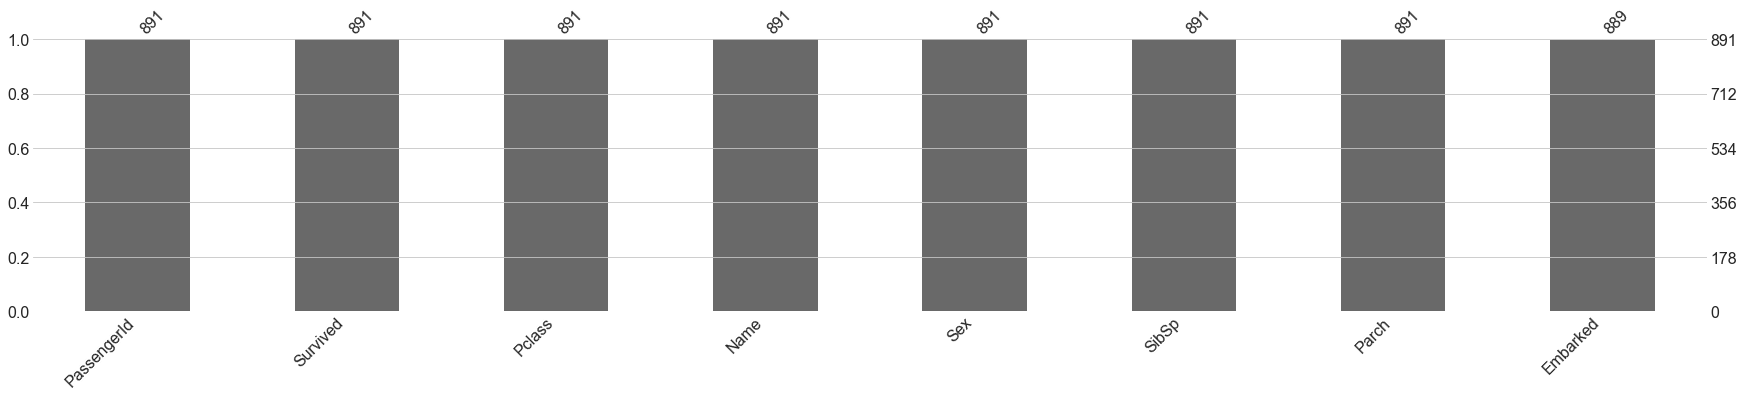

In [9]:
# How many missing values are there in our dataset?
missingno.matrix(df_2015, figsize = (30,5))

missingno.bar(df_2015, sort='ascending', figsize = (30,5))

## Tabbular format

df_2015.isnull().sum()